In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

node = "LoA.C0736"  # Adjust as needed
filestem = "fil_60859_24992_38453552_JPLH_ATLAS_0001-beam0000_unblanked"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem) 
print("**********************************")

# Read your unblanked bliss results file
unblanked_bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True,  # using whitespace since your file preview has space separation
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

# Make interactive scatter plot
fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",         # transparency
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=2))

fig.show()


**********************************
Beginning quick node plotter for: LoA.C0736/fil_60859_24992_38453552_JPLH_ATLAS_0001-beam0000_unblanked
**********************************
Number of hits:  71764


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_35545/2715193873.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



(array([6.700e+02, 7.060e+02, 7.580e+02, 7.000e+02, 1.206e+03, 1.933e+03,
        3.149e+03, 3.963e+03, 4.544e+03, 4.233e+03, 3.214e+03, 3.545e+03,
        4.021e+03, 3.084e+03, 2.671e+03, 2.041e+03, 2.228e+03, 1.386e+03,
        1.035e+03, 1.031e+03, 9.980e+02, 6.250e+02, 6.110e+02, 6.220e+02,
        6.560e+02, 5.100e+02, 5.030e+02, 5.050e+02, 2.350e+02, 2.940e+02,
        2.600e+02, 2.940e+02, 1.700e+02, 1.000e+02, 1.020e+02, 1.030e+02,
        4.500e+02, 4.700e+02, 6.900e+01, 1.600e+01, 1.000e+00, 5.000e+00,
        1.000e+00, 4.000e+00, 8.000e+00, 2.900e+01, 3.200e+01, 6.000e+01,
        1.600e+01, 3.000e+00, 4.500e+01, 2.000e+00, 1.000e+00, 9.840e+02,
        4.060e+02, 6.850e+02, 4.000e+00, 1.178e+03, 1.558e+03, 2.084e+03,
        2.440e+02, 3.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 3.400e+01,
        3.000e+00, 2.000e+01, 1.300e+01, 2.200e+01, 2.800e+01, 3.000e+01,
        4.000e+01, 2.500e+01, 7.200e+0

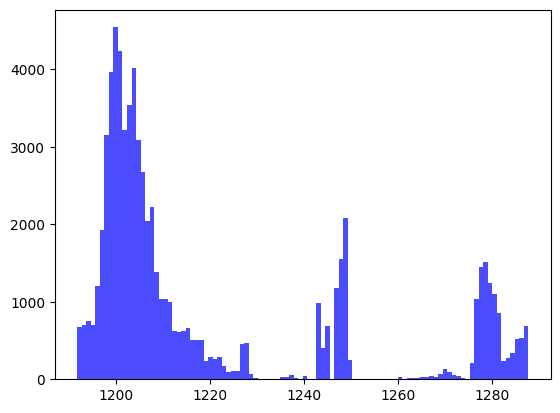

In [2]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [34]:
# define frequency ranges to blank, in MHz

blanking_ranges = [[1190, 1227], 
                   [1275, 1290],
                   [1246, 1250]]

# remove hits in blanked ranges
for range in blanking_ranges:
    unblanked_bliss_results = unblanked_bliss_results[~unblanked_bliss_results["Uncorrected_Frequency"].between(range[0], range[1])]

Number of hits:  4016


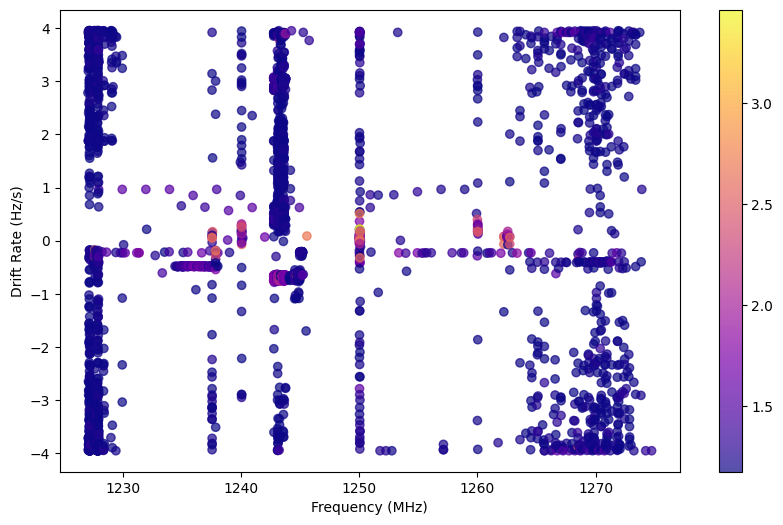

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.cool

scatter = ax.scatter(unblanked_bliss_results['Uncorrected_Frequency'],
                     unblanked_bliss_results['Drift_Rate'], 
                     c=np.log10(unblanked_bliss_results['SNR']), 
                     alpha=0.7,
                     cmap='plasma')

plt.xlabel("Frequency (MHz)")
plt.ylabel("Drift Rate (Hz/s)")

fig.colorbar(scatter)
print("Number of hits: ", len(unblanked_bliss_results))

(array([411., 459.,  40.,   3.,  32.,   4.,   9.,   0.,   1.,   2.,   2.,
          1.,   0.,   2.,   2.,   5.,  12.,  15.,  15.,  14.,  16.,  16.,
         50.,   2.,   2.,   1.,   0.,  45.,   0.,   2.,   0.,   1.,  71.,
        552., 669.,  54., 258., 456.,  17.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 107.,   0.,   3.,   3.,   1.,   1.,   2.,
          2.,   2.,   0.,   2.,   2.,   2.,   0.,   1.,   3.,   1.,   0.,
          3.,   0.,   1.,  32.,   1.,   2.,   1.,   6.,  14.,   1.,  12.,
          3.,  19.,  25.,  20.,   5.,  13.,  26.,   9.,  11.,  22.,  33.,
         37.,  69.,  64.,  51.,  46.,  26.,  33.,  29.,  14.,   9.,   4.,
          1.]),
 array([1227.017388  , 1227.49470813, 1227.97202826, 1228.44934839,
        1228.92666852, 1229.40398865, 1229.88130878, 1230.35862891,
        1230.83594904, 1231.31326917, 1231.7905893 , 1232.26790943,
        1232.74522956, 1233.22254969, 1233.69986982, 1234.17718995,
        1234.65451008, 1235.13183021, 1235.609

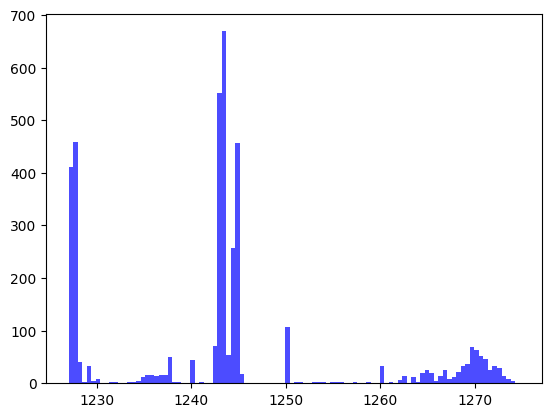

In [36]:
plt.hist(unblanked_bliss_results['Uncorrected_Frequency'], bins=100, color='blue', alpha=0.7)


In [ ]:
print("Number of hits: ", len(unblanked_bliss_results))

# Add log10 SNR for color scale
unblanked_bliss_results['logSNR'] = np.log10(unblanked_bliss_results['SNR'])

# Make interactive scatter plot
fig = px.scatter(
    unblanked_bliss_results,
    x="Uncorrected_Frequency",
    y="Drift_Rate",
    color="logSNR",
    color_continuous_scale="plasma",       
    hover_name="Top_Hit_#",        
    labels={"Uncorrected_Frequency": "Frequency (MHz)",
            "Drift_Rate": "Drift Rate (Hz/s)",
            "logSNR": "log10(SNR)"},
    title=f"Node: {node}"
)

# Tweak marker size
fig.update_traces(marker=dict(size=2))

fig.show()

Number of hits:  2953
